1. Import the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2. Read, preprocess and print main statistic about the dataset 

In [ ]:
df_penguins = pd.read_csv('penguins_size.csv')

In [ ]:
df_penguins.shape

(344, 7)

In [ ]:
df_penguins.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [ ]:
df_penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
df_penguins.isnull().sum(axis=0)

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [ ]:
df_penguins = df_penguins.dropna(axis=0)

3. Convert features with string datatype to categorical (species, island, sex)

In [ ]:
df_penguins['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [ ]:
encodings = {'Adelie': [1,0,0], 'Chinstrap':[0,1,0], 'Gentoo': [0,0,1]}

In [ ]:
df_penguins['species'] = df_penguins.apply(lambda x: encodings[x['species']], axis = 1)

In [ ]:
df_penguins['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [ ]:
encodings_island = {'Torgersen': [1,0,0], 'Biscoe':[0,1,0], 'Dream': [0,0,1]}

In [ ]:
df_penguins['island'] = df_penguins.apply(lambda x: encodings_island[x['island']], axis = 1)

In [ ]:
encodings_gender = {'MALE': 1, 'FEMALE': 0}

In [ ]:
df_penguins.groupby(by ='sex').count()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
sex,,,,,,
.,1,1,1,1,1,1
FEMALE,165,165,165,165,165,165
MALE,168,168,168,168,168,168


In [ ]:
i = df_penguins[(df_penguins.sex == '.')].index
df_penguins = df_penguins.drop(i)

In [ ]:
df_penguins['sex'] = df_penguins.apply(lambda x: encodings_gender[x['sex']], axis = 1)

4. Normalize non-categorical features (culmen_length_mm, culmen_depth_mm,
flipper_length_mm, body_mass_g)
a. Find the min and max values for each column
b. Rescale dataset columns to the range from 0 to 1

In [ ]:
min_max = df_penguins[['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']].agg(['min','max'])

In [ ]:
min_max

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
min,32.1,13.1,172.0,2700.0
max,59.6,21.5,231.0,6300.0


In [ ]:
df_penguins

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,"[1, 0, 0]","[1, 0, 0]",39.1,18.7,181.0,3750.0,1
1,"[1, 0, 0]","[1, 0, 0]",39.5,17.4,186.0,3800.0,0
2,"[1, 0, 0]","[1, 0, 0]",40.3,18.0,195.0,3250.0,0
4,"[1, 0, 0]","[1, 0, 0]",36.7,19.3,193.0,3450.0,0
5,"[1, 0, 0]","[1, 0, 0]",39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...,...,...
338,"[0, 0, 1]","[0, 1, 0]",47.2,13.7,214.0,4925.0,0
340,"[0, 0, 1]","[0, 1, 0]",46.8,14.3,215.0,4850.0,0
341,"[0, 0, 1]","[0, 1, 0]",50.4,15.7,222.0,5750.0,1
342,"[0, 0, 1]","[0, 1, 0]",45.2,14.8,212.0,5200.0,0


In [ ]:
df_penguins[['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']] = (df_penguins[['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']]-min_max.loc['min'])/(min_max.loc['max']-min_max.loc['min'])

In [ ]:
df_penguins

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,"[1, 0, 0]","[1, 0, 0]",0.254545,0.666667,0.152542,0.291667,1
1,"[1, 0, 0]","[1, 0, 0]",0.269091,0.511905,0.237288,0.305556,0
2,"[1, 0, 0]","[1, 0, 0]",0.298182,0.583333,0.389831,0.152778,0
4,"[1, 0, 0]","[1, 0, 0]",0.167273,0.738095,0.355932,0.208333,0
5,"[1, 0, 0]","[1, 0, 0]",0.261818,0.892857,0.305085,0.263889,1
...,...,...,...,...,...,...,...
338,"[0, 0, 1]","[0, 1, 0]",0.549091,0.071429,0.711864,0.618056,0
340,"[0, 0, 1]","[0, 1, 0]",0.534545,0.142857,0.728814,0.597222,0
341,"[0, 0, 1]","[0, 1, 0]",0.665455,0.309524,0.847458,0.847222,1
342,"[0, 0, 1]","[0, 1, 0]",0.476364,0.202381,0.677966,0.694444,0


5. Choose your target Y. For this dataset, there is a number of options:
a. We can use binary classifier to predict which gender a penguin belongs to
(female or male). In this case column sex can be used as Y (target)

6. Create the data matrices for X (input) and Y (target) in a shape X = 𝑁 x 𝑑 and
Y = 𝑁 x 1, where 𝑁 is a number of data samples and 𝑑 is a number of features. 

In [ ]:
X = df_penguins.loc[:, df_penguins.columns != 'body_mass_g']


In [ ]:
X.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'sex'],
      dtype='object')

In [ ]:
X_species = X.set_index(['culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm','sex'])['species'].apply(pd.Series)
X_species.columns = ['Species_Adelie', 'Species_Chinstrap', 'Species_Gentoo']
X_island = X.set_index(['culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm','sex'])['island'].apply(pd.Series)
X_island.columns = ['Island_Torgersen', 'Island_Biscoe', 'Island_Dream']


In [ ]:
X = pd.concat([X_species, X_island], axis=1).reset_index()

In [ ]:
X.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,sex,Species_Adelie,Species_Chinstrap,Species_Gentoo,Island_Torgersen,Island_Biscoe,Island_Dream
0,0.254545,0.666667,0.152542,1,1,0,0,1,0,0
1,0.269091,0.511905,0.237288,0,1,0,0,1,0,0
2,0.298182,0.583333,0.389831,0,1,0,0,1,0,0
3,0.167273,0.738095,0.355932,0,1,0,0,1,0,0
4,0.261818,0.892857,0.305085,1,1,0,0,1,0,0


In [ ]:
Y = df_penguins.loc[:, df_penguins.columns == 'body_mass_g']

In [ ]:
Y.head()

,body_mass_g
0,0.291667
1,0.305556
2,0.152778
4,0.208333
5,0.263889


7. Divide the dataset into training and test, as 80% - training, 20% - testing dataset.

In [ ]:
X_train = X.sample(frac=0.8, random_state=50)

# New Section

In [ ]:
X_test = X.drop(X_train.index)

In [ ]:
Y_train = Y.sample(frac=0.8, random_state=50)

In [ ]:
Y_test = Y.drop(Y_train.index)

8. Print the shape of your X_train, y_train, X_test, y_test

In [ ]:
X_train

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,sex,Species_Adelie,Species_Chinstrap,Species_Gentoo,Island_Torgersen,Island_Biscoe,Island_Dream
16,0.203636,0.666667,0.135593,1,1,0,0,0,1,0
220,0.483636,0.178571,0.661017,0,0,0,1,0,1,0
222,0.407273,0.035714,0.627119,0,0,0,1,0,1,0
3,0.167273,0.738095,0.355932,0,1,0,0,1,0,0
74,0.090909,0.488095,0.288136,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
320,0.581818,0.238095,0.627119,1,0,0,1,0,1,0
5,0.247273,0.559524,0.152542,0,1,0,0,1,0,0
143,0.207273,0.595238,0.355932,1,1,0,0,0,0,1
27,0.269091,0.559524,0.271186,0,1,0,0,0,0,1


In [ ]:
Y_train

,body_mass_g
21,0.250000
226,0.583333
228,0.472222
4,0.208333
80,0.138889
...,...
329,0.777778
6,0.256944
149,0.291667
32,0.166667


In [ ]:
X_train.shape

(266, 10)

In [ ]:
X_test.shape

(67, 10)

In [ ]:
Y_train.shape

(266, 1)

In [ ]:
Y_test.shape

(67, 1)

9. Recommended structure of your code to define Linear regression:

In [ ]:
#Weights
W = np.dot(np.linalg.inv(np.dot(X_train.T,X_train)),np.dot(X_train.T,Y_train))
print(W)

[[-4.11252902]
 [-1.91047703]
 [ 5.61087372]
 [ 0.55333485]
 [ 1.        ]
 [ 1.        ]
 [ 0.        ]
 [ 1.        ]
 [ 0.        ]
 [-1.        ]]


In [ ]:
Y_train.squeeze()

21     0.250000
226    0.583333
228    0.472222
4      0.208333
80     0.138889
         ...   
329    0.777778
6      0.256944
149    0.291667
32     0.166667
177    0.402778
Name: body_mass_g, Length: 266, dtype: float64

10.Train the model:

In [ ]:
mse = (np.sum((Y_train.squeeze() - np.sum(W.T*X_train,axis=1))**2))/len(X_train)
print(mse)

1.2234819564175148


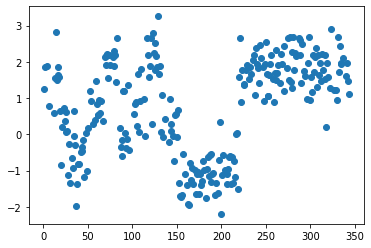

In [ ]:
plt.scatter(Y_train.index,np.sum(W.T*X_train,axis=1))
plt.show()

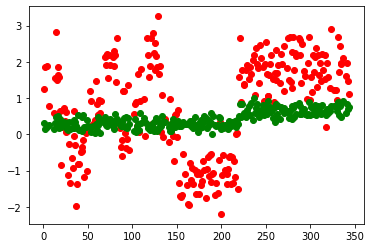

In [ ]:
plt.scatter(Y_train.index,np.sum(W.T*X_train,axis=1),color='r')
plt.scatter(Y_train.index,Y_train,color='g')
plt.show()

# New Section